Iteration 0, Cost: 616.7709316604402
Iteration 100, Cost: 555.2532203927689
Iteration 200, Cost: 521.0151032935375
Iteration 300, Cost: 501.1094934882307
Iteration 400, Cost: 489.02264710829456
Iteration 500, Cost: 481.40626940891474
Iteration 600, Cost: 476.45927433180896
Iteration 700, Cost: 473.16623903215554
Iteration 800, Cost: 470.92997711579414
Iteration 900, Cost: 469.38628180628484
Random Data Used:
   Sex  Age  Pclass  Parch
0    1   24       1      3
1    1   12       1      0
2    0    2       1      1
3    0   16       3      3
4    1   27       1      2
5    0   28       2      2
6    1   48       1      1
7    1   10       1      0
8    0   73       1      1
9    0   64       3      1
Random Data with Predictions:
   Sex  Age  Pclass  Parch  Predicted_Survived
0    1   24       1      3                   1
1    1   12       1      0                   1
2    0    2       1      1                   0
3    0   16       3      3                   1
4    1   27       1      2

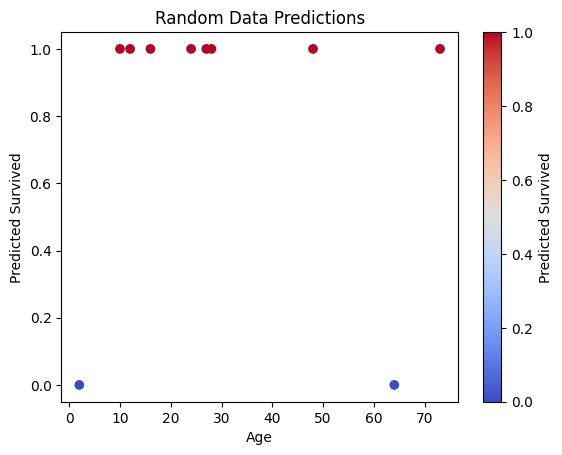

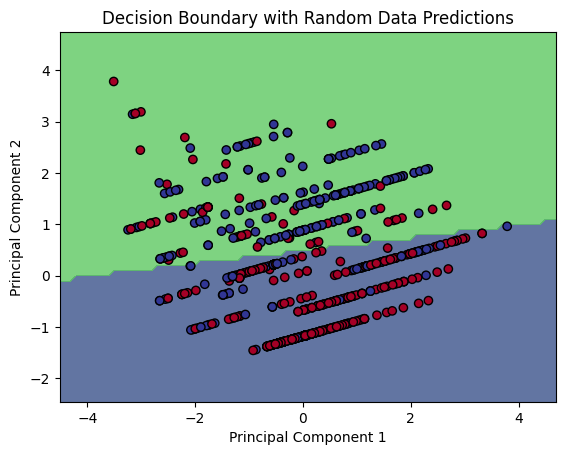

In [11]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load Titanic dataset
file_path = r'C:\Users\luluh\Downloads/Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)

# Preprocessing
X = titanic_data[['Sex', 'Age', 'Pclass', 'Parch']]
y = titanic_data['Survived']
X.loc[:, 'Age'] = X['Age'].fillna(X['Age'].mean())
X.loc[:, 'Sex'] = X['Sex'].map({'female': 1, 'male': 0})

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction (optional, for 2D plotting)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Initialize parameters
m, n = X_pca.shape
w = np.zeros(n)
b = 0

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function with regularization
def compute_cost_reg(X, y, w, b, lambda_=1):
    m = len(y)
    predictions = sigmoid(np.dot(X, w) + b)
    cost_without_reg = np.sum(-y * np.log(predictions) - (1 - y) * np.log(1 - predictions))
    reg_cost = (lambda_ / (2 * m)) * np.sum(w ** 2)
    total_cost = cost_without_reg + reg_cost
    return total_cost

# Gradient computation with regularization
def compute_gradient_reg(X, y, w, b, lambda_=1):
    m = len(y)
    dj_db = 0
    dj_dw = np.zeros_like(w)
    prediction = sigmoid(np.dot(X, w) + b)
    
    for i in range(m):
        error_i = prediction[i] - y.iloc[i]
        dj_db += error_i
        dj_dw += error_i * X[i, :]  # No need to reshape since X[i, :] is a 1D vector already
        
#alternative using vectorisation - dj_dw = (np.dot(X.T, error) / m) + (lambda_ / m) * w
    
    dj_db /= m
    dj_dw /= m
    dj_dw += (lambda_ / m) * w
    return dj_dw, dj_db

# Gradient descent function
def gradient_descent(X, y, w, b, lambda_, learning_rate=0.01, num_iterations=1000):
    cost_history = []
    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradient_reg(X, y, w, b, lambda_)
        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db

        if i % 100 == 0:
            cost = compute_cost_reg(X, y, w, b, lambda_)
            cost_history.append(cost)
            print(f'Iteration {i}, Cost: {cost}')
    
    return w, b, cost_history

# Training the model
lambda_ = 1
w, b, cost_history = gradient_descent(X_pca, y, w, b, lambda_, learning_rate=0.01, num_iterations=1000)

# Prediction on random data
random_data = pd.DataFrame({
    'Sex': [random.choice([0, 1]) for _ in range(10)],
    'Age': [random.randint(1, 80) for _ in range(10)],
    'Pclass': [random.choice([1, 2, 3]) for _ in range(10)],
    'Parch': [random.choice([0, 1, 2, 3]) for _ in range(10)]
})

print("Random Data Used:")
print(random_data) 

# Preprocess and scale random data
random_data_scaled = scaler.transform(random_data[['Sex', 'Age', 'Pclass', 'Parch']])
random_data_pca = pca.transform(random_data_scaled)

# Get predictions
predictions = sigmoid(np.dot(random_data_pca, w) + b)
predictions = (predictions >= 0.5).astype(int)

# Add predictions to random data
random_data['Predicted_Survived'] = predictions
print("Random Data with Predictions:")
print(random_data)


# Display predictions
print(f"Predictions on random data: {predictions}")

# Plot Age vs Predicted Survived
plt.scatter(random_data['Age'], random_data['Predicted_Survived'], c=random_data['Predicted_Survived'], cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Predicted Survived')
plt.title('Random Data Predictions')
plt.colorbar(label='Predicted Survived')
plt.show()

# Plot the decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1)) 
Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b)
Z = (Z >= 0.5).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k', marker='o')
plt.title('Decision Boundary with Random Data Predictions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
